In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";   

In this example, we will apply *ktrain* to the dataset employed in the **scikit-learn** [Working with Text Data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) tutorial.  As in the tutorial, we will sample 4 newgroups to create a relatively small multiclass text classification dataset.  This will provide us an opportunity to see BERT in action on a very small training set.  Let's fetch the [20newsgroups dataset](http://qwone.com/~jason/20Newsgroups/) using **scikit-learn**.

In [3]:
categories = ['alt.atheism', 'soc.religion.christian',
             'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
train_b = fetch_20newsgroups(subset='train',
   categories=categories, shuffle=True, random_state=42)
test_b = fetch_20newsgroups(subset='test',
   categories=categories, shuffle=True, random_state=42)

print('size of training set: %s' % (len(train_b['data'])))
print('size of validation set: %s' % (len(test_b['data'])))
print('classes: %s' % (train_b.target_names))

x_train = train_b.data
y_train = train_b.target
x_test = test_b.data
y_test = test_b.target

size of training set: 2257
size of validation set: 1502
classes: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


In [4]:
import ktrain
from ktrain import text

Using TensorFlow backend.


In [5]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                       x_test=x_test, y_test=y_test,
                                                                       class_names=train_b.target_names,
                                                                       preprocess_mode='bert',
                                                                       ngram_range=1, 
                                                                       maxlen=350, 
                                                                       max_features=35000)

preprocessing train...


preprocessing test...


In [6]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 350
done.


In [7]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), batch_size=6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
2257/2257 [==============================] - 110s 49ms/step - loss: 1.3606 - acc: 0.3833
Epoch 2/1024
2257/2257 [==============================] - 94s 42ms/step - loss: 0.3663 - acc: 0.8861
Epoch 3/1024
 186/2257 [=>............................] - ETA: 1:25 - loss: 1.2041 - acc: 0.4946

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


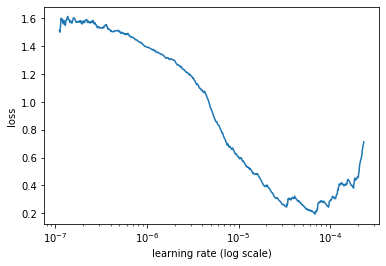

In [8]:
learner.lr_find()
learner.lr_plot()

In [8]:
learner.autofit(2e-5, 5)



begin training using triangular learning rate policy with max lr of 2e-05...
Epoch 1/5
2257/2257 [==============================] - 104s 46ms/step - loss: 0.5075 - acc: 0.8019
Epoch 2/5
2257/2257 [==============================] - 95s 42ms/step - loss: 0.0892 - acc: 0.9703
Epoch 3/5
2257/2257 [==============================] - 95s 42ms/step - loss: 0.0302 - acc: 0.9925
Epoch 4/5
2257/2257 [==============================] - 95s 42ms/step - loss: 0.0156 - acc: 0.9951
Epoch 5/5
2257/2257 [==============================] - 95s 42ms/step - loss: 0.0040 - acc: 0.9987


In [11]:
learner.validate(val_data=(x_test, y_test))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       319
           1       0.96      0.98      0.97       389
           2       0.98      0.95      0.97       396
           3       0.94      0.98      0.96       398

    accuracy                           0.96      1502
   macro avg       0.96      0.96      0.96      1502
weighted avg       0.96      0.96      0.96      1502



array([[292,   6,   3,  18],
       [  4, 383,   1,   1],
       [  9,   7, 376,   4],
       [  2,   1,   3, 392]])

In [12]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [13]:
predictor.get_classes()

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [14]:
predictor.predict(test_b.data[0:3])

['sci.med', 'sci.med', 'sci.med']

In [15]:
test_b.target[:3]

array([2, 2, 2])